In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm

# Set pandas to display 10 rows only
pd.options.display.max_rows = 10

## Data Import & Parsing
Importing the LIWC Processed data files across the years and concat them into 1 file.

In [5]:
df1 = pd.read_csv('liwc_data\RC_2014_18_counts_liwc.csv')
df2 = pd.read_csv('liwc_data\RC_2019_counts_liwc.csv')

In [6]:
df = pd.concat([df1, df2])

## Data cleaning
# Dictionary to map original column headings to new column headings

In [7]:
column_mapping = {'A': 'parent_id',
                  'B': 'author',
                  'C': 'subreddit',
                  'D': 'created_utc',
                  'F': 'subreddit_id',
                  'H': 'id',
                  'J': 'utterance'}

# Rename columns using the dictionary
df.rename(columns=column_mapping, inplace=True)

# Select the necessary columns
df = df[['parent_id', 'author', 'subreddit', 'created_utc', 'subreddit_id', 'id', 'utterance', 
         'i', 'ppron', 'we', 'Tone', 'posemo', 'negemo']]

In [8]:
# Group the DataFrame by province
grouped = df.groupby('subreddit')

# Create a dictionary to store DataFrames for each subreddit
subreddit_dfs = {}

# Iterate over groups
for subreddit, group_df in grouped:
    # Store each group DataFrame in the dictionary
    subreddit_dfs[subreddit] = group_df


In [9]:
# Iterate over each subreddit
for subreddit in subreddit_dfs:
    # Initialize a list to store the data for the current subreddit
    table_data = []
    
    # Calculate mean, standard deviation, maximum, and minimum values for each feature
    features = ['i', 'ppron', 'we', 'Tone', 'posemo', 'negemo']
    for feature in features:
        mean_value = np.mean(subreddit_dfs[subreddit][feature])
        std_dev = np.std(subreddit_dfs[subreddit][feature])
        min_value = np.min(subreddit_dfs[subreddit][feature])
        max_value = np.max(subreddit_dfs[subreddit][feature])
        
        # Append the data to the list for the current subreddit
        table_data.append([feature, mean_value, std_dev, min_value, max_value])
    
    # Define the headers
    headers = ['Linguist Marker', 'Mean', 'Std Dev', 'Min value', 'Max value']
    
    # Print the table for the current subreddit in LaTeX format
    print(f"\\addlinespace[0.5em]\n{subreddit}\n\\hline")
    print(tabulate(table_data, headers=headers, tablefmt='latex_raw'))
    print("\\end{tabular}\n\\end{table}\n")

\addlinespace[0.5em]
Manitoba
\hline
\begin{tabular}{lrrrr}
\hline
 Linguist Marker   &      Mean &   Std Dev &   Min value &   Max value \\
\hline
 i                 &  2.75461  &   2.88126 &           0 &       17.02 \\
 ppron             &  7.22583  &   3.95328 &           0 &       24    \\
 we                &  0.632958 &   1.26308 &           0 &       10.71 \\
 Tone              & 49.1286   &  35.1516  &           1 &       99    \\
 posemo            &  3.11855  &   2.40005 &           0 &       15.79 \\
 negemo            &  1.86592  &   2.04824 &           0 &       17.65 \\
\hline
\end{tabular}
\end{tabular}
\end{table}

\addlinespace[0.5em]
NovaScotia
\hline
\begin{tabular}{lrrrr}
\hline
 Linguist Marker   &      Mean &   Std Dev &   Min value &   Max value \\
\hline
 i                 &  2.59702  &   2.71668 &           0 &       20    \\
 ppron             &  6.92567  &   3.84035 &           0 &       27.66 \\
 we                &  0.696329 &   1.41085 &           0 &    

\addlinespace[0.5em]
Quebec
\hline
\begin{tabular}{lrrrr}
\hline
 Linguist Marker   &      Mean &   Std Dev &   Min value &   Max value \\
\hline
 i                 &  0.838064 &  1.81366  &           0 &       20.31 \\
 ppron             &  2.14375  &  3.70101  &           0 &       27.78 \\
 we                &  0.230654 &  0.871885 &           0 &       13.79 \\
 Tone              & 37.4297   & 24.4667   &           1 &       99    \\
 posemo            &  1.3364   &  1.76353  &           0 &       95.45 \\
 negemo            &  0.797185 &  1.38328  &           0 &       19.23 \\
\hline
\end{tabular}
\end{tabular}
\end{table}

\addlinespace[0.5em]
alberta
\hline
\begin{tabular}{lrrrr}
\hline
 Linguist Marker   &      Mean &   Std Dev &   Min value &   Max value \\
\hline
 i                 &  2.20765  &   2.52063 &           0 &       23.4  \\
 ppron             &  6.89011  &   3.86227 &           0 &       30    \\
 we                &  0.860866 &   1.52284 &           0 &       18

## Chi2 Tests: Depression vs Yoga
These tests are mainly used to see if our findings replicate that of related work and convergences on the markers (positive emotion words, negative emotions words,
and pronoun usage)


In [10]:
# Chi2 Test for significance between yoga and depression for all LIWC categories
#  we are interested in 
categories = df.columns[10:]
subreddits = ["depression", "yoga"]
data = {'depression': {},
        'yoga': {}}
for category in categories:
    category_data = []
    for subreddit in subreddits:
        data[subreddit][category] = subreddit_dfs[subreddit][category].sum()
contingency_table = pd.DataFrame(data).T
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"All categories, Chi-square p-value: {p}")
contingency_table

All categories, Chi-square p-value: 0.0


,Tone,posemo,negemo
depression,43770901.05,4121227.03,3660323.49
yoga,5990696.74,376409.61,144644.62


In [13]:
# Chi2 Test for significance between yoga and depression for categories we are interested in (EMOTION WORDS)
#  we are interested in 
categories = ["Tone", "posemo", "negemo"]
subreddits = ["depression", "yoga"]

data = {'depression': {},
        'yoga': {}}
for category in categories:
    category_data = []
    for subreddit in subreddits:
        data[subreddit][category] = subreddit_dfs[subreddit][category].sum()
contingency_table = pd.DataFrame(data).T

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Category: Tone, posemo, negemo | Chi-square p-value: {p}")
contingency_table

Category: Tone, posemo, negemo | Chi-square p-value: 0.0


,Tone,posemo,negemo
depression,43770901.05,4121227.03,3660323.49
yoga,5990696.74,376409.61,144644.62


In [12]:
# Chi2 Test for significance between yoga and depression for categories we are interested in (PERSONAL PRONOUNS)
#  we are interested in 
categories = ["ppron", "i", "we",]
subreddits = ["depression", "yoga"]
data = {'depression': {},
        'yoga': {}}
for category in categories:
    category_data = []
    for subreddit in subreddits:
        data[subreddit][category] = subreddit_dfs[subreddit][category].sum()
contingency_table = pd.DataFrame(data).T

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Category: ppron, i, we | Chi-square p-value: {p}")
contingency_table

Category: ppron, i, we | Chi-square p-value: 7.090892369906911e-114


,ppron,i,we
depression,13901402.54,7735642.23,412389.39
yoga,954159.25,509679.33,27836.16


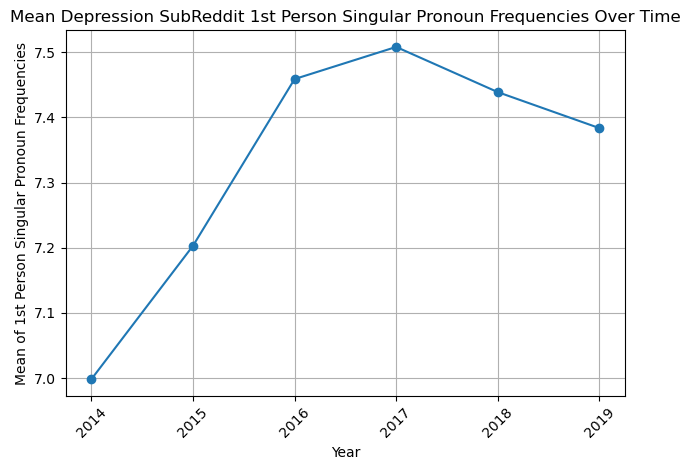

In [14]:
df = subreddit_dfs['depression']
# Convert UTC timestamp to pandas datetime object
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Extract the year from the timestamp
df['year'] = df['created_utc'].dt.year

# Group by year and calculate the mean score
mean_scores_by_year = df.groupby('year')['i'].mean()

# Create a line plot to visualize mean scores across the years
mean_scores_by_year.plot(kind='line', marker='o', linestyle='-')
plt.title('Mean Depression SubReddit 1st Person Singular Pronoun Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Mean of 1st Person Singular Pronoun Frequencies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

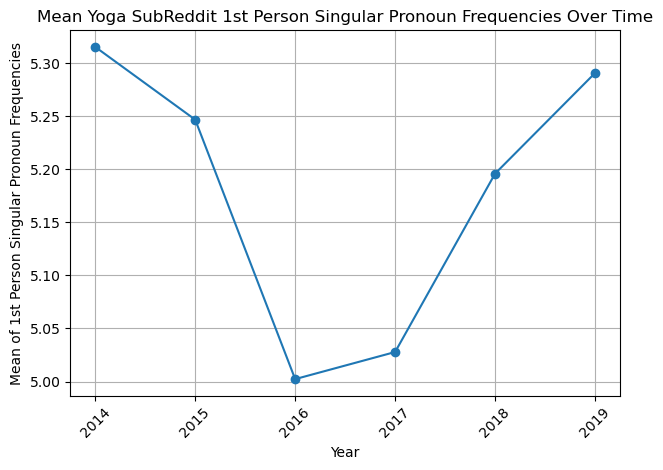

In [15]:
df = subreddit_dfs['yoga']
# Convert UTC timestamp to pandas datetime object
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Extract the year from the timestamp
df['year'] = df['created_utc'].dt.year

# Group by year and calculate the mean score
mean_scores_by_year = df.groupby('year')['i'].mean()

# Create a line plot to visualize mean scores across the years
mean_scores_by_year.plot(kind='line', marker='o', linestyle='-')
plt.title('Mean Yoga SubReddit 1st Person Singular Pronoun Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Mean of 1st Person Singular Pronoun Frequencies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


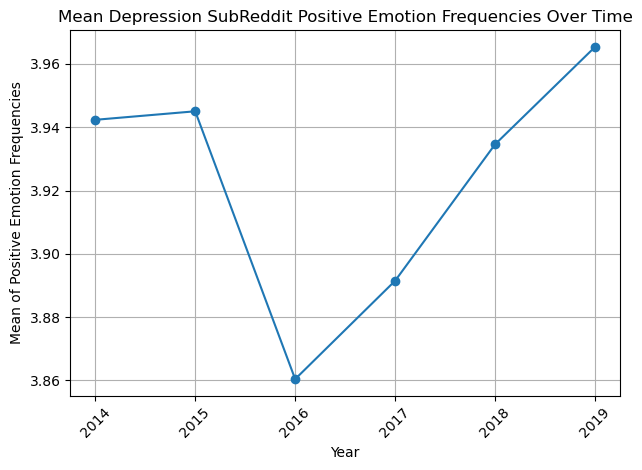

In [16]:
df = subreddit_dfs['depression']
# Convert UTC timestamp to pandas datetime object
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Extract the year from the timestamp
df['year'] = df['created_utc'].dt.year

# Group by year and calculate the mean score
mean_scores_by_year = df.groupby('year')['posemo'].mean()

# Create a line plot to visualize mean scores across the years
mean_scores_by_year.plot(kind='line', marker='o', linestyle='-')
plt.title('Mean Depression SubReddit Positive Emotion Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Mean of Positive Emotion Frequencies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


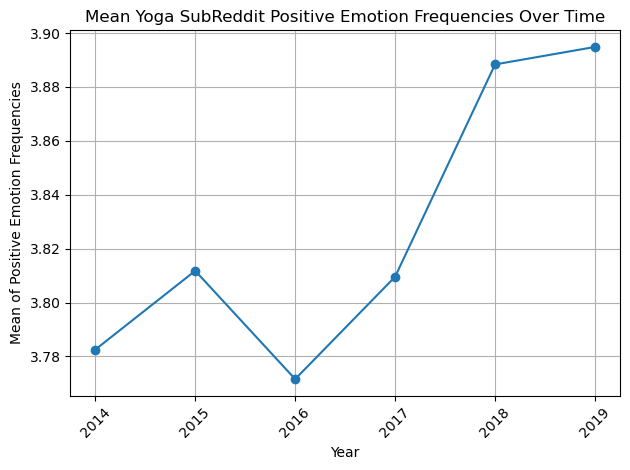

In [17]:
df = subreddit_dfs['yoga']
# Convert UTC timestamp to pandas datetime object
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Extract the year from the timestamp
df['year'] = df['created_utc'].dt.year

# Group by year and calculate the mean score
mean_scores_by_year = df.groupby('year')['posemo'].mean()

# Create a line plot to visualize mean scores across the years
mean_scores_by_year.plot(kind='line', marker='o', linestyle='-')
plt.title('Mean Yoga SubReddit Positive Emotion Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Mean of Positive Emotion Frequencies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


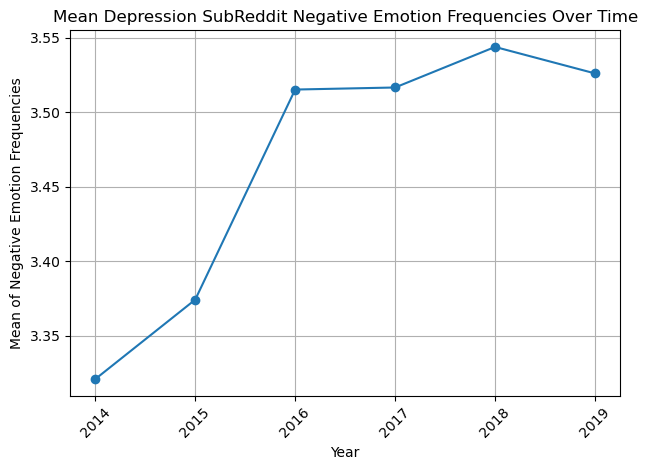

In [18]:
df = subreddit_dfs['depression']
# Convert UTC timestamp to pandas datetime object
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Extract the year from the timestamp
df['year'] = df['created_utc'].dt.year

# Group by year and calculate the mean score
mean_scores_by_year = df.groupby('year')['negemo'].mean()

# Create a line plot to visualize mean scores across the years
mean_scores_by_year.plot(kind='line', marker='o', linestyle='-')
plt.title('Mean Depression SubReddit Negative Emotion Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Mean of Negative Emotion Frequencies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


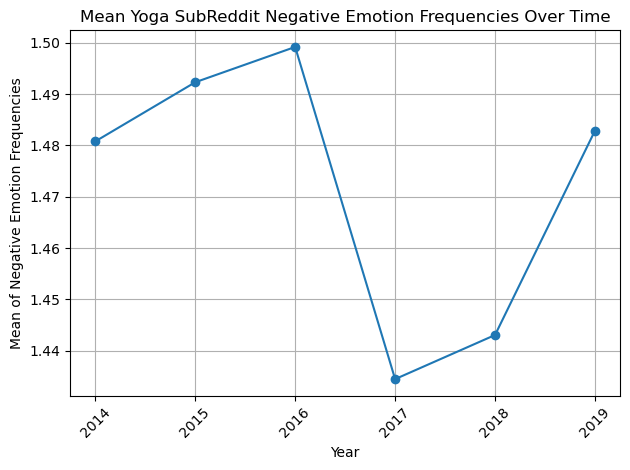

dict_keys(['Manitoba', 'NovaScotia', 'PEI', 'Quebec', 'alberta', 'britishcolumbia', 'depression', 'newbrunswickcanada', 'newfoundland', 'ontario', 'saskatchewan', 'yoga'])


In [19]:
df = subreddit_dfs['yoga']
# Convert UTC timestamp to pandas datetime object
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Extract the year from the timestamp
df['year'] = df['created_utc'].dt.year

# Group by year and calculate the mean score
mean_scores_by_year = df.groupby('year')['negemo'].mean()

# Create a line plot to visualize mean scores across the years
mean_scores_by_year.plot(kind='line', marker='o', linestyle='-')
plt.title('Mean Yoga SubReddit Negative Emotion Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Mean of Negative Emotion Frequencies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(subreddit_dfs.keys())

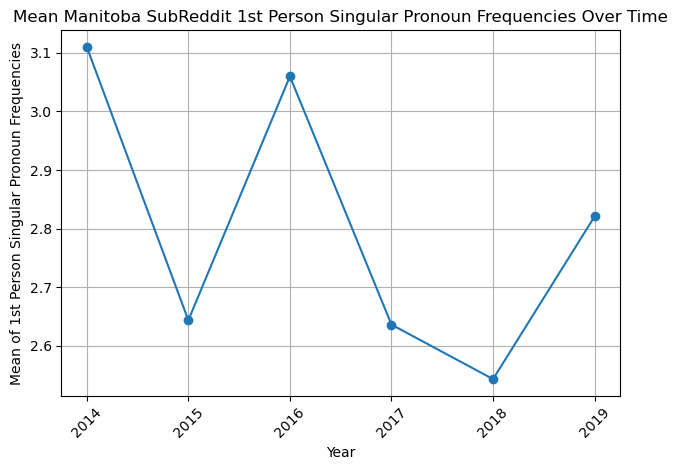

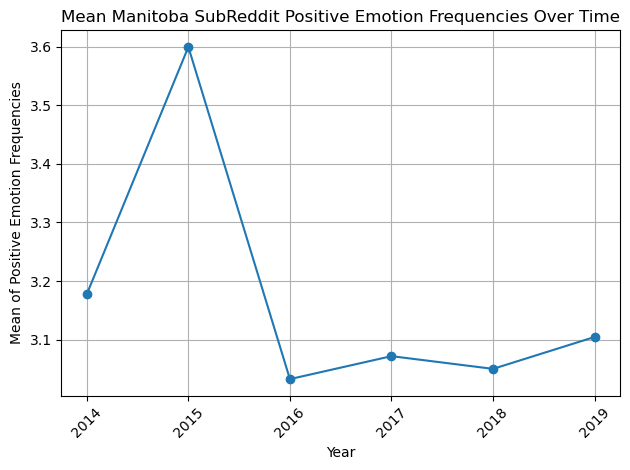

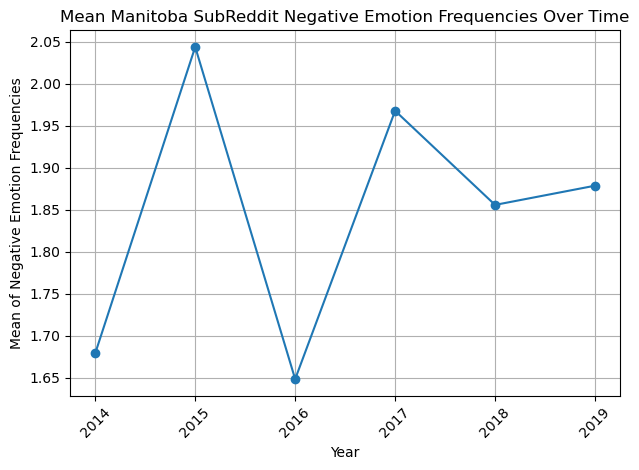

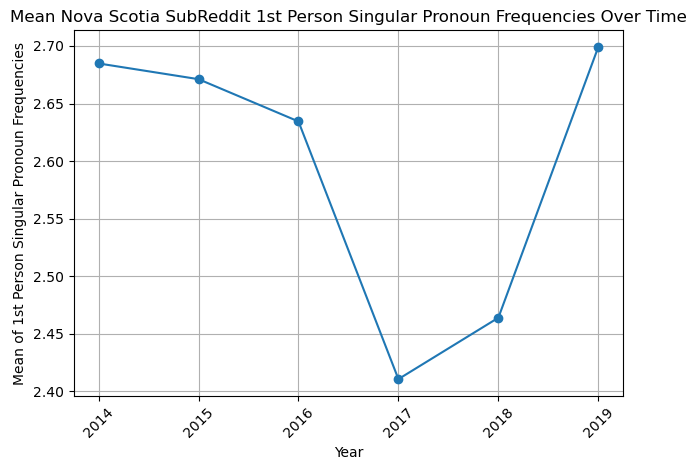

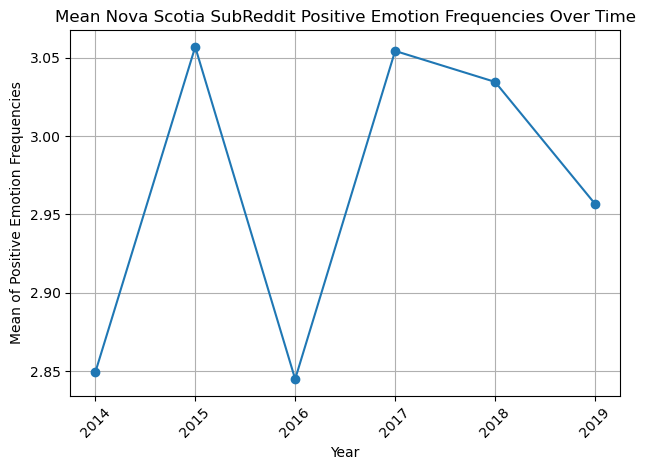

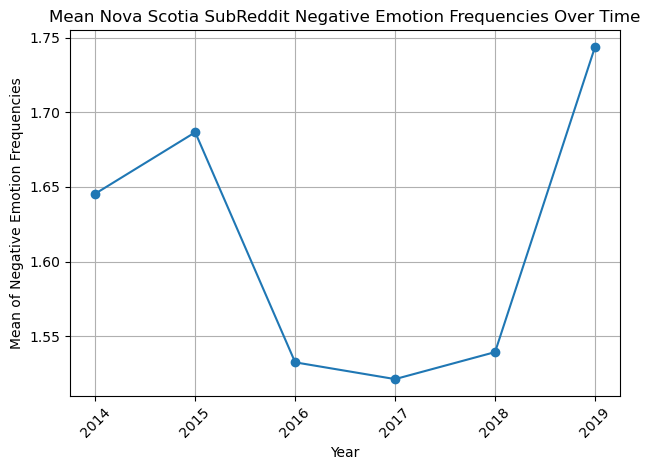

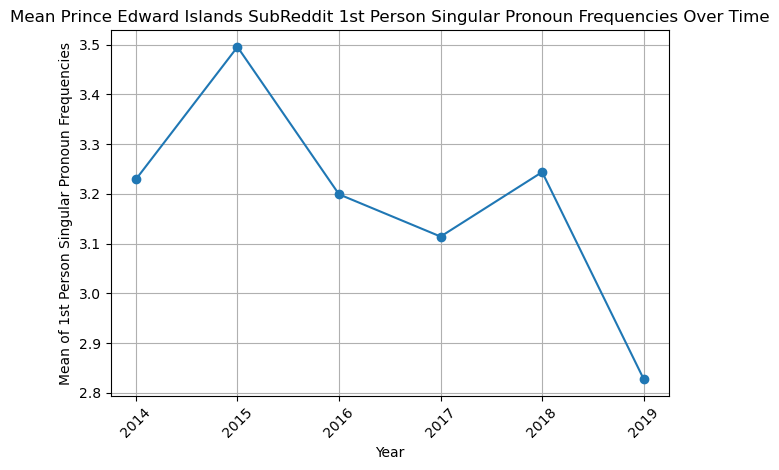

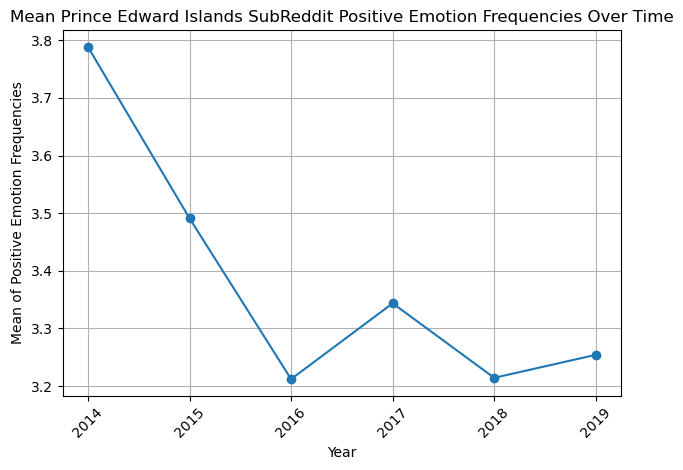

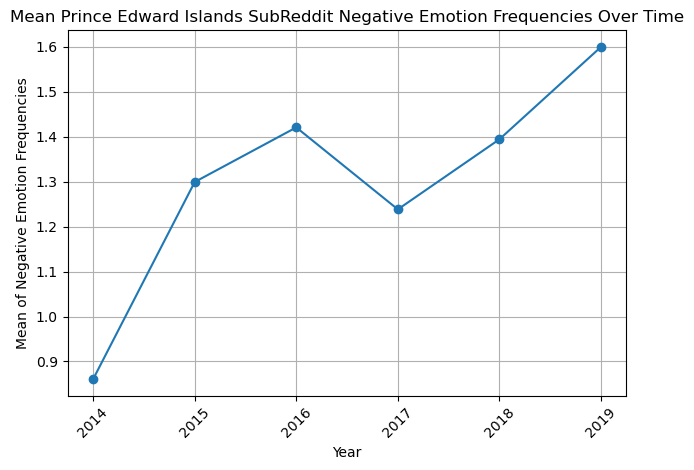

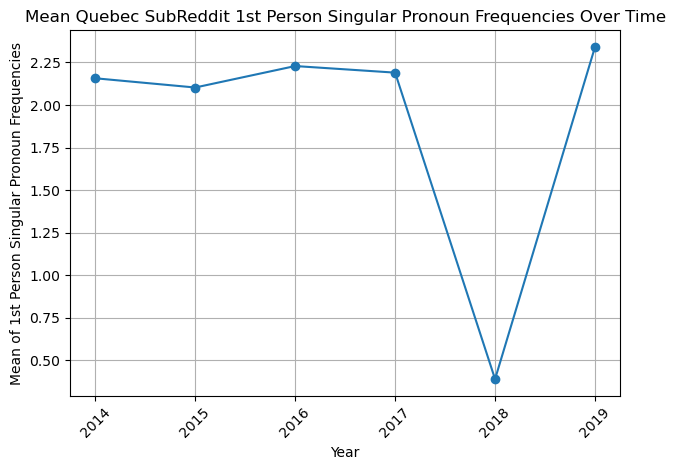

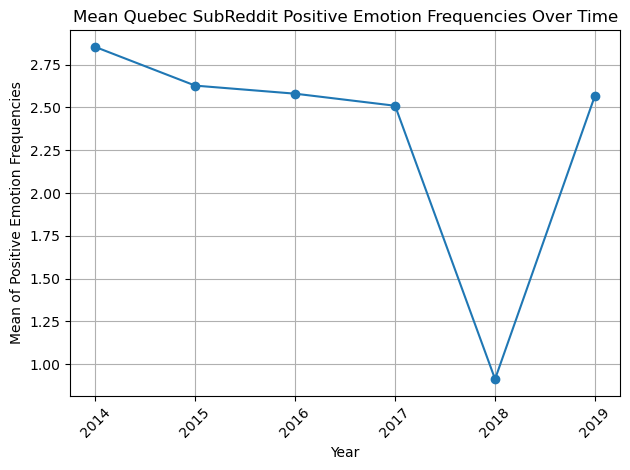

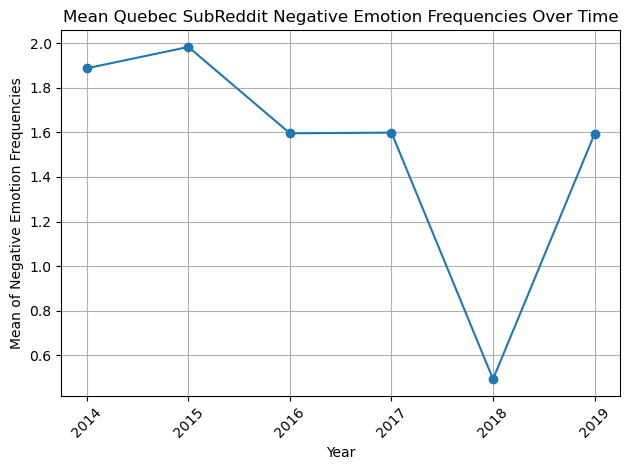

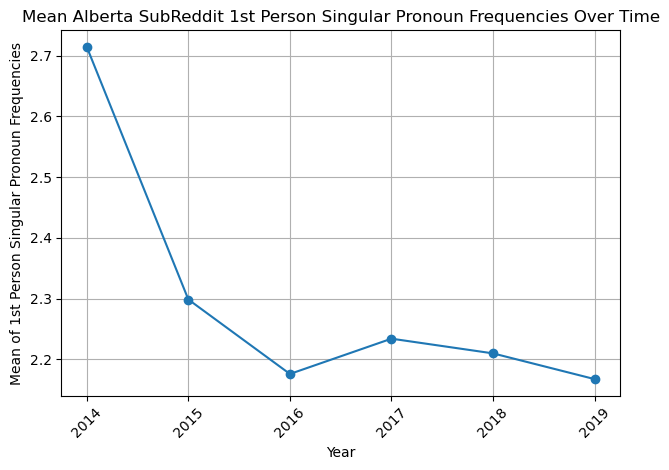

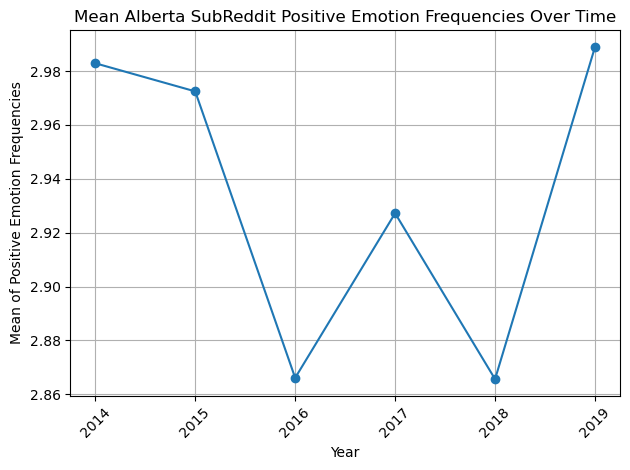

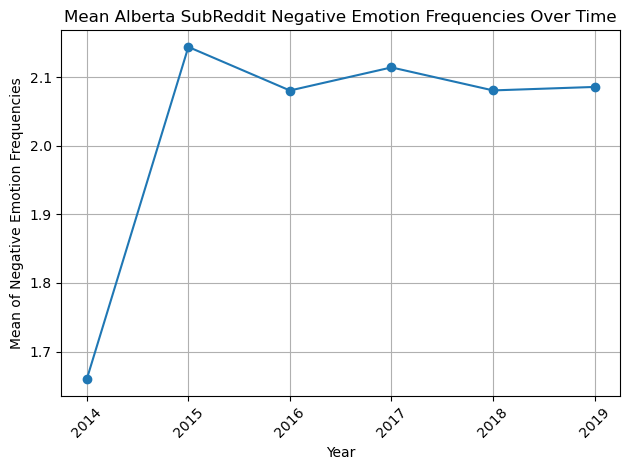

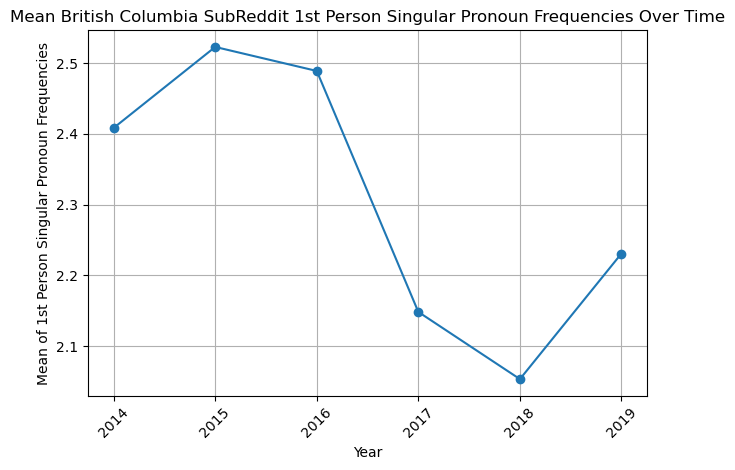

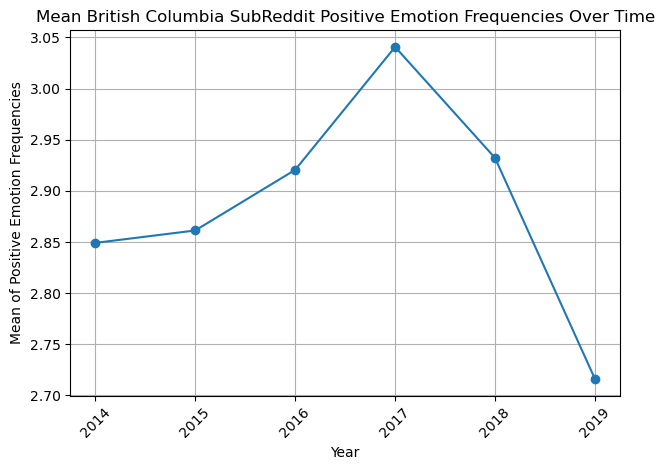

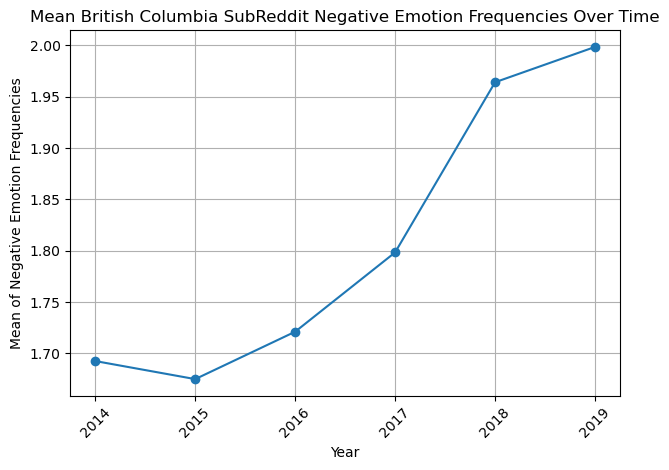

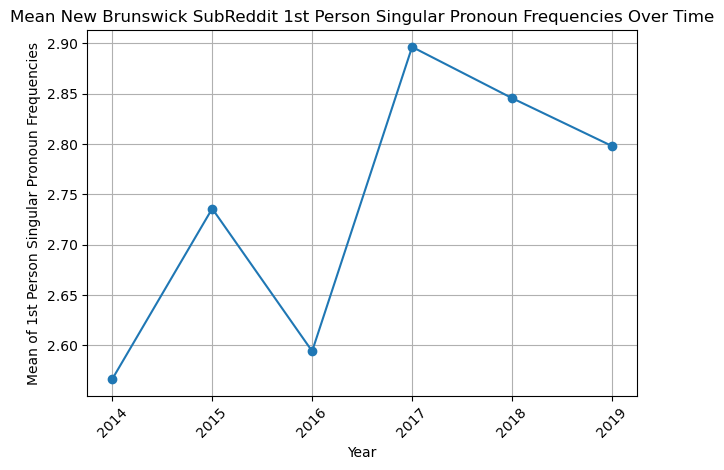

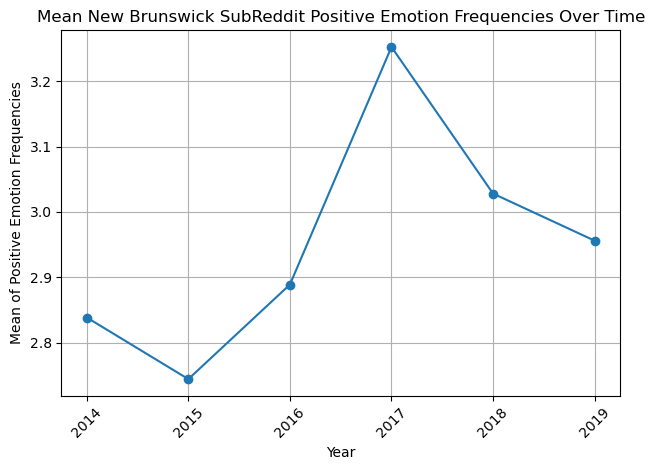

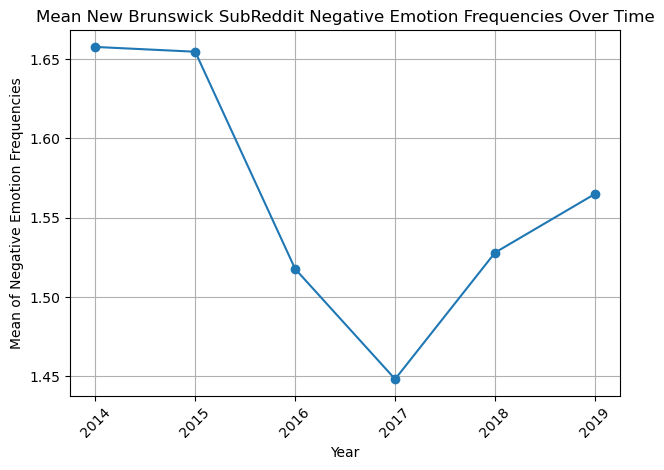

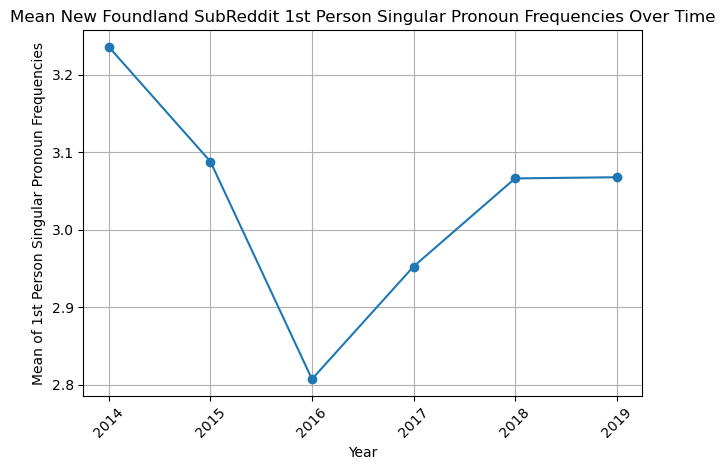

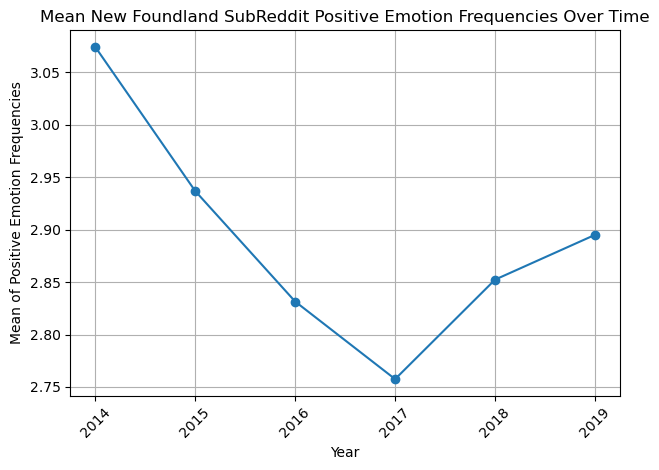

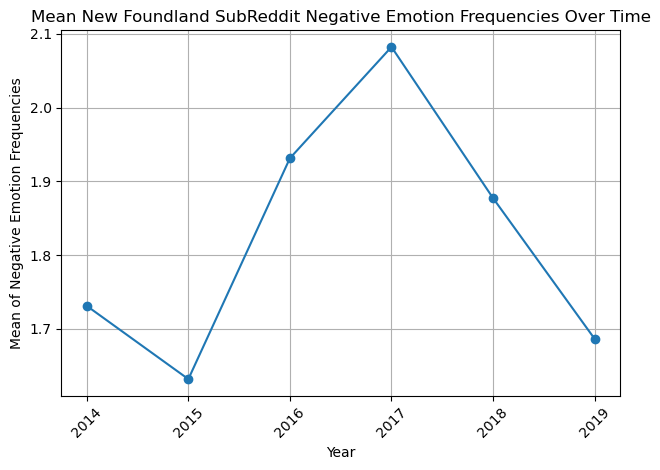

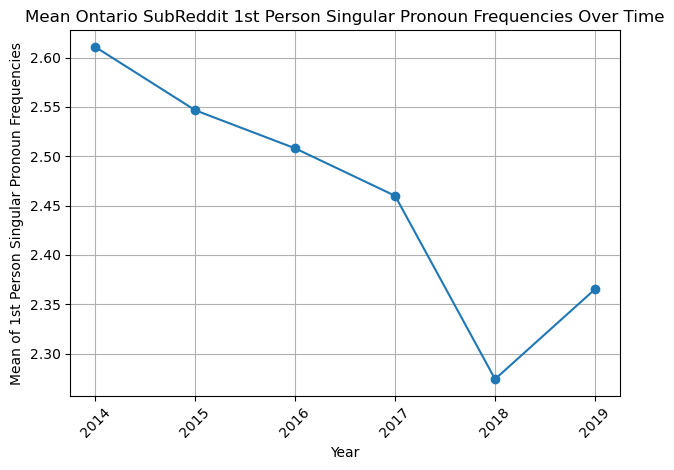

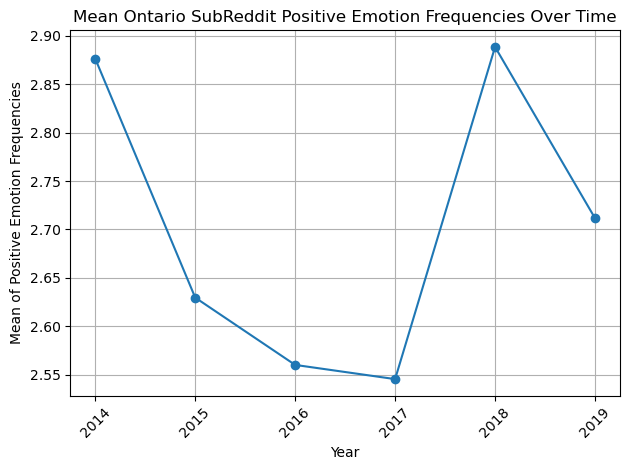

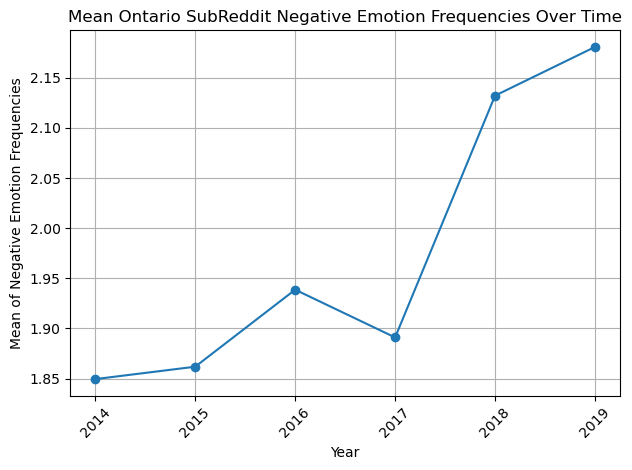

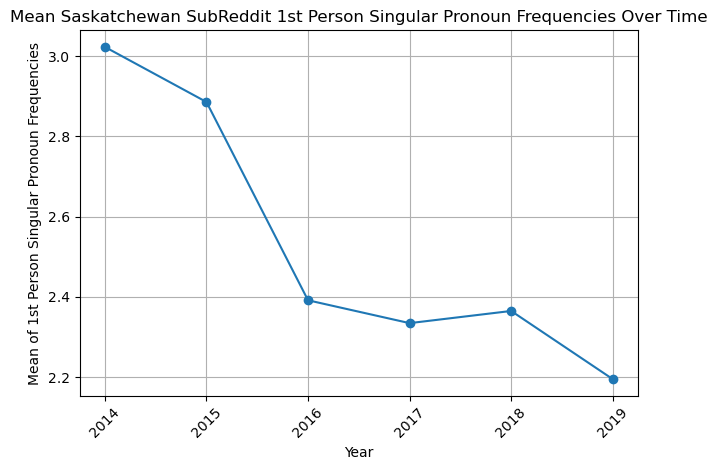

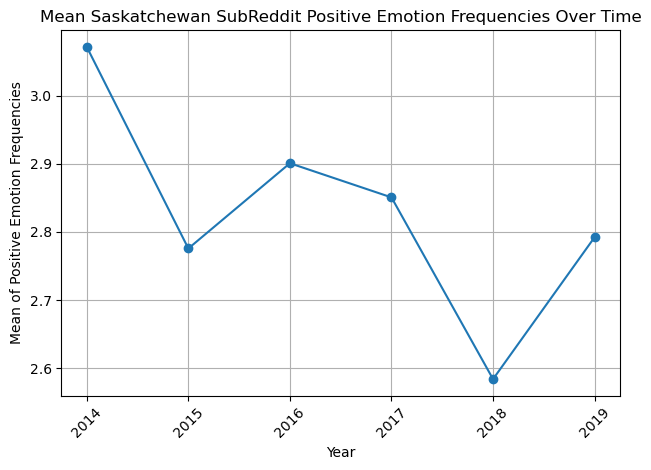

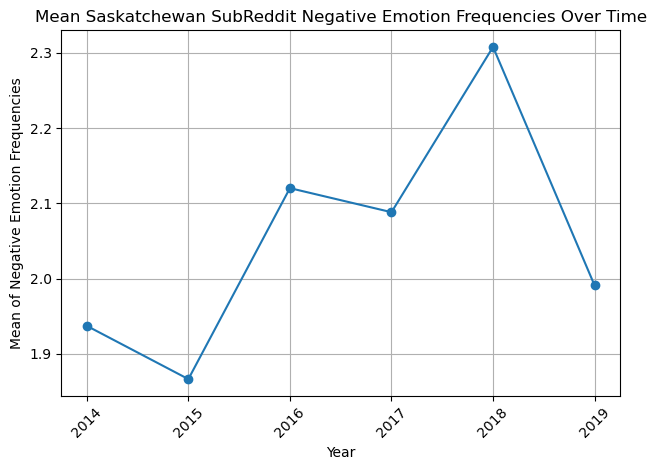

In [11]:
provinces = {'Manitoba': 'Manitoba', 'NovaScotia': 'Nova Scotia', 'PEI': 'Prince Edward Islands', 'Quebec': 'Quebec', 'alberta': 'Alberta', 'britishcolumbia': 'British Columbia','newbrunswickcanada': 'New Brunswick', 'newfoundland': 'New Foundland', 'ontario': 'Ontario', 'saskatchewan': 'Saskatchewan'}
frequencies = {'i': '1st Person Singular Pronoun Frequencies', 'posemo': 'Positive Emotion Frequencies','negemo':'Negative Emotion Frequencies'}

# Iterate over provinces and frequencies
for province_key, province_name in provinces.items():
    for freq_key, freq_name in frequencies.items():
        # Convert UTC timestamp to pandas datetime object
        df = subreddit_dfs[province_key]
        df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

        # Extract the year from the timestamp
        df['year'] = df['created_utc'].dt.year

        # Group by year and calculate the mean score
        mean_scores_by_year = df.groupby('year')[freq_key].mean()

        # Create a line plot to visualize mean scores across the years
        mean_scores_by_year.plot(kind='line', marker='o', linestyle='-')
        plt.title(f'Mean {province_name} SubReddit {freq_name} Over Time')
        plt.xlabel('Year')
        plt.ylabel(f'Mean of {freq_name}')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Logistic Regression: Province Subreddits
Using the markers that we tested in the last section we will train a logistic regression model on the r/depression subreddit data and use it to make prediction on the r/{province} subreddits

In [12]:
# Create a dictionary for frequencies for each subreddit for the regression
subreddit_freq = {}

# Define the markers identified from chi-square tests
markers = ["Tone", "posemo", "negemo", "ppron", "i", "we"]

subset = df[markers]
# Iterate over subreddits and populate their frequencies
for subreddit in subreddit_dfs.keys():
    frequencies = np.zeros((6, ))
    for i in range(6):
        frequencies[i] = np.sum(subreddit_dfs[subreddit][markers[i]])
    subreddit_freq[subreddit] = frequencies


In [13]:
def create_train_binary_prediction_target_pairs(subreddit_dfs, markers):
    # The training pairs will be as follows
    # predicitons - (1 for r/depression, 0 for r/yoga)
    # target - (1 for markers meeting threshold determined by mean of r/depression, 0 for markers not meeting threshold)
    depression_matrix = np.array(subreddit_dfs['depression'][markers])
    yoga_matrix = np.array(subreddit_dfs['yoga'][markers])
    
    # Find thresholds for markers, operationalized by means of r/subreddit
    mean_tone = np.mean(subreddit_dfs['depression']['Tone'])
    mean_posemo = np.mean(subreddit_dfs['depression']['posemo'])
    mean_negemo = np.mean(subreddit_dfs['depression']['negemo'])
    mean_ppron = np.mean(subreddit_dfs['depression']['ppron'])
    mean_i = np.mean(subreddit_dfs['depression']['i'])
    mean_we = np.mean(subreddit_dfs['depression']['we'])
    
    # Creating masks for based on individual markers
    marker_means = np.array([mean_tone, mean_posemo, mean_negemo, mean_ppron, mean_i, mean_we]) # expect more negative words and personal pronouns but less positive words and more negative tone
    depression_mask = depression_matrix > marker_means
    yoga_mask = yoga_matrix > marker_means

    # Create masks based on total marker presence
    markers_present = np.array([False, False, True, True, True, True])
    depression_mask1 = np.all(depression_mask == markers_present, axis=1)
    yoga_mask1 = np.all(yoga_mask == markers_present, axis=1)
    
    # Create training targets
    depression_targets = np.zeros(depression_mask1.shape)
    depression_targets[depression_mask1] = 1
    depression_targets[~depression_mask1] = 0
    yoga_targets = np.zeros(yoga_mask1.shape)
    yoga_targets[yoga_mask1] = 1
    yoga_targets[~yoga_mask1] = 0
    train_targets = np.hstack((depression_targets, yoga_targets))

    # Create training predictors
    depression_predictors = np.ones(depression_targets.shape)
    yoga_predictors = np.zeros(yoga_targets.shape)
    train_predictors = np.hstack((depression_predictors, yoga_predictors))

    return train_predictors, train_targets


train_predictors, train_targets = create_train_binary_prediction_target_pairs(subreddit_dfs, markers)

# GOOD INDICATION: 125 are true for yoga and 18,487 are true for depression 

In [14]:
def create_test_binary_prediction_target_pairs(subreddit_dfs, subreddit, markers):
    # The testing pairs will be as follows
    # predicitons - (1 for r/depression, 0 for r/yoga)
    # target - (1 for markers meeting threshold determined by mean of r/depression, 0 for markers not meeting threshold)
    subreddit_matrix = np.array(subreddit_dfs[subreddit][markers])
    
    # Find thresholds for markers, operationalized by means of r/subreddit
    mean_tone = np.mean(subreddit_dfs['depression']['Tone'])
    mean_posemo = np.mean(subreddit_dfs['depression']['posemo'])
    mean_negemo = np.mean(subreddit_dfs['depression']['negemo'])
    mean_ppron = np.mean(subreddit_dfs['depression']['ppron'])
    mean_i = np.mean(subreddit_dfs['depression']['i'])
    mean_we = np.mean(subreddit_dfs['depression']['we'])
    
    # Creating masks for based on individual markers
    marker_means = np.array([mean_tone, mean_posemo, mean_negemo, mean_ppron, mean_i, mean_we]) # expect more negative words and personal pronouns but less positive words and more negative tone
    subreddit_mask = subreddit_matrix > marker_means

    # Create masks based on total marker presence
    markers_present = np.array([False, False, True, True, True, True])
    subreddit_mask1 = np.all(subreddit_mask == markers_present, axis=1)
    
    # Create test targets
    targets = np.zeros(subreddit_mask1.shape)
    targets[subreddit_mask1] = 1
    targets[~subreddit_mask1] = 0
   

    # Create test predictors
    predictors = np.zeros(targets.shape) 

    return predictors, targets

In [15]:
X = train_predictors
Y = train_targets
X = sm.add_constant(X)

# Train the logistic regression model
model = sm.Logit(Y, X)
logit_result = model.fit()
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.081821
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1148381
Model:                          Logit   Df Residuals:                  1148379
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Apr 2024   Pseudo R-squ.:                 0.01285
Time:                        05:12:49   Log-Likelihood:                -93961.
converged:                       True   LL-Null:                       -95185.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6658      0.089    -74.479      0.000      -6.841      -6.490
x1             2.6440      0

In [16]:
# Test the model on posts from other subreddits
for subreddit in subreddit_dfs:
    test_predictors, test_targets = create_test_binary_prediction_target_pairs(subreddit_dfs, subreddit, markers)
    test_predictors = sm.add_constant(test_predictors)
    predictions = logit_result.predict(test_predictors)

    # Convert probabilities to binary predictions (0 or 1)
    binary_predictions = np.round(predictions, decimals=0)
    print(f"Results for {subreddit}:")
    print(classification_report(test_targets, binary_predictions, zero_division=0))

Results for Manitoba:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2542
         1.0       0.00      0.00      0.00         7

    accuracy                           1.00      2549
   macro avg       0.50      0.50      0.50      2549
weighted avg       0.99      1.00      1.00      2549

Results for NovaScotia:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10784
         1.0       0.00      0.00      0.00         5

    accuracy                           1.00     10789
   macro avg       0.50      0.50      0.50     10789
weighted avg       1.00      1.00      1.00     10789

Results for PEI:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4626
         1.0       0.00      0.00      0.00         5

    accuracy                           1.00      4631
   macro avg       0.50      0.50      0.50      4631
weighted av